In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:/Users/Rahul/OneDrive/Desktop/jupyter/RELIANCE.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,36.747459,38.944569,36.747459,38.944569,29.684196,28802010
1,04-01-2000,39.981236,42.062302,38.882679,42.062302,32.060574,61320457
2,05-01-2000,39.710464,44.545658,39.710464,43.710136,33.316589,173426953
3,06-01-2000,44.715855,46.526150,44.715855,45.543640,34.714119,101355113
4,07-01-2000,45.644211,49.187443,45.334759,48.669109,37.096401,128426756


In [3]:
df.shape


(5881, 7)

In [4]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5.881000e+03
mean,680.252319,688.289465,671.576300,679.622003,657.850591,1.657509e+07
std,724.916450,732.286643,716.993735,724.362004,728.284564,1.796390e+07
min,31.796223,33.962387,30.504259,31.440351,23.964357,0.000000e+00
25%,113.568993,115.495331,111.766434,113.004242,99.420486,6.218616e+06
50%,454.690002,461.500427,448.300568,453.773682,424.583252,1.000023e+07
75%,784.315491,791.324036,774.161743,783.956360,763.602112,2.002437e+07
max,2856.149902,2856.149902,2797.000000,2841.850098,2841.850098,2.918015e+08


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5881 non-null   object 
 1   Open       5881 non-null   float64
 2   High       5881 non-null   float64
 3   Low        5881 non-null   float64
 4   Close      5881 non-null   float64
 5   Adj Close  5881 non-null   float64
 6   Volume     5881 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 321.7+ KB


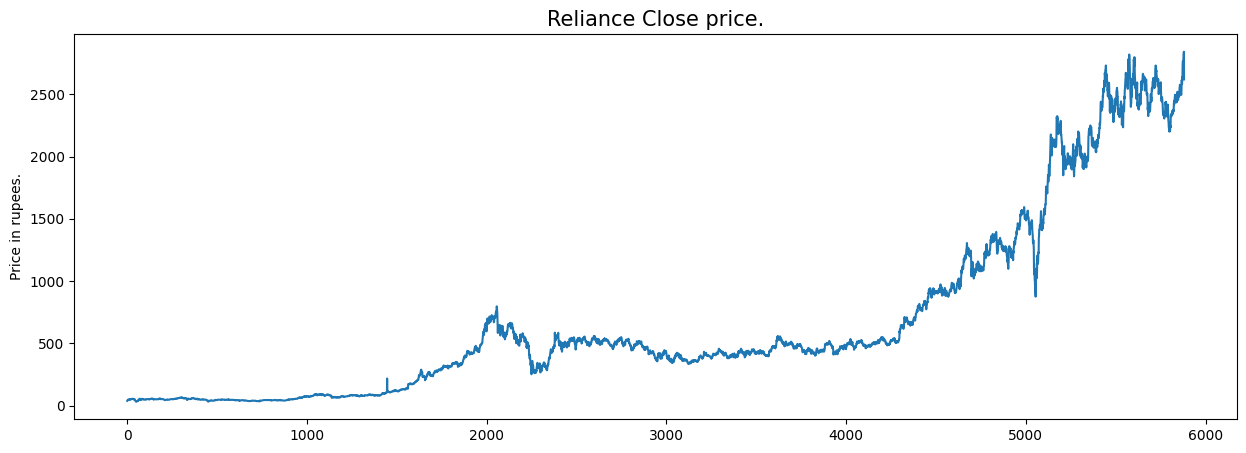

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the Excel file into a DataFrame
df = pd.read_csv(r'C:\Users\Rahul\OneDrive\Desktop\jupyter\RELIANCE.csv')

plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Reliance Close price.', fontsize=15)
plt.ylabel('Price in rupees.')
plt.show()


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,36.747459,38.944569,36.747459,38.944569,29.684196,28802010
1,04-01-2000,39.981236,42.062302,38.882679,42.062302,32.060574,61320457
2,05-01-2000,39.710464,44.545658,39.710464,43.710136,33.316589,173426953
3,06-01-2000,44.715855,46.526150,44.715855,45.543640,34.714119,101355113
4,07-01-2000,45.644211,49.187443,45.334759,48.669109,37.096401,128426756


In [8]:

df[df['Close'] == df['Adj Close']].shape

(229, 7)

In [9]:

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

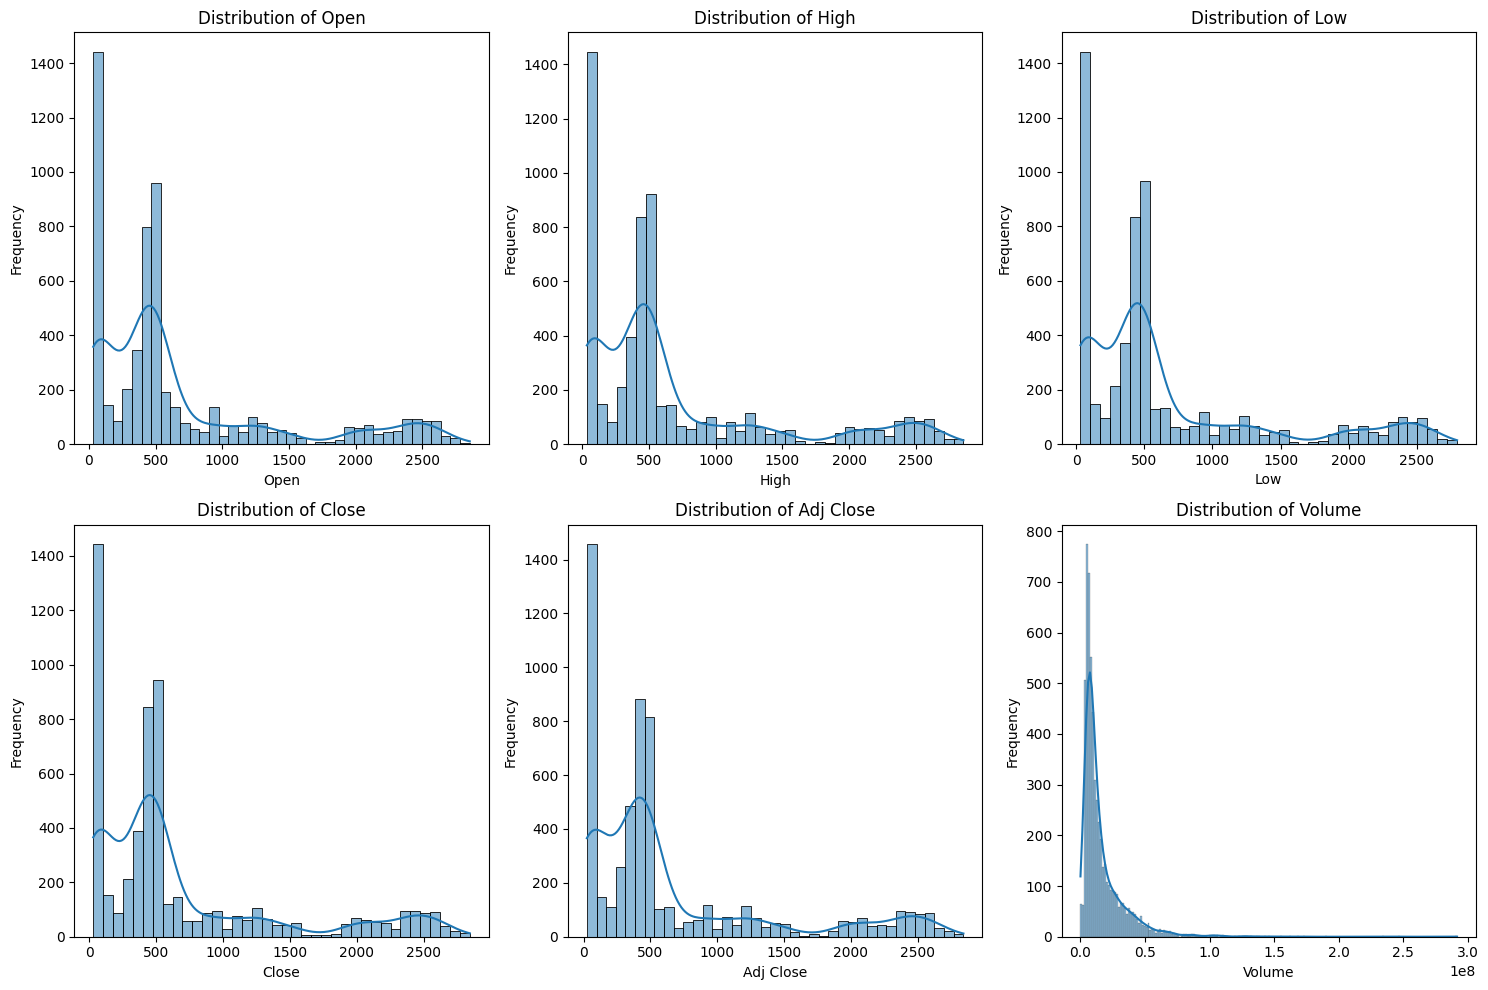

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Assuming df is a DataFrame containing the data you want to plot
# Let's assume you want to plot numeric columns only

numeric_columns = df.select_dtypes(include=[int, float]).columns

# Check if there are numeric columns to plot
if numeric_columns.empty:
    print("No numeric columns found in the DataFrame.")
else:
    num_cols = len(numeric_columns)
    rows = (num_cols - 1) // 3 + 1  # Calculate the number of subplot rows based on 3 columns per row

    plt.figure(figsize=(15, 5 * rows))  # Set the figure size based on the number of rows

    for i, col in enumerate(numeric_columns):
        plt.subplot(rows, 3, i + 1)  # Adjust subplot placement based on the number of columns
        sb.histplot(df[col], kde=True)  # Using histplot for numeric data
        plt.xlabel(col)  # Add x-axis label with column name
        plt.ylabel("Frequency")  # Add y-axis label for histogram frequency
        plt.title(f'Distribution of {col}')  # Add a title for each subplot

    plt.tight_layout()  # Ensures that the subplots do not overlap
    plt.show()


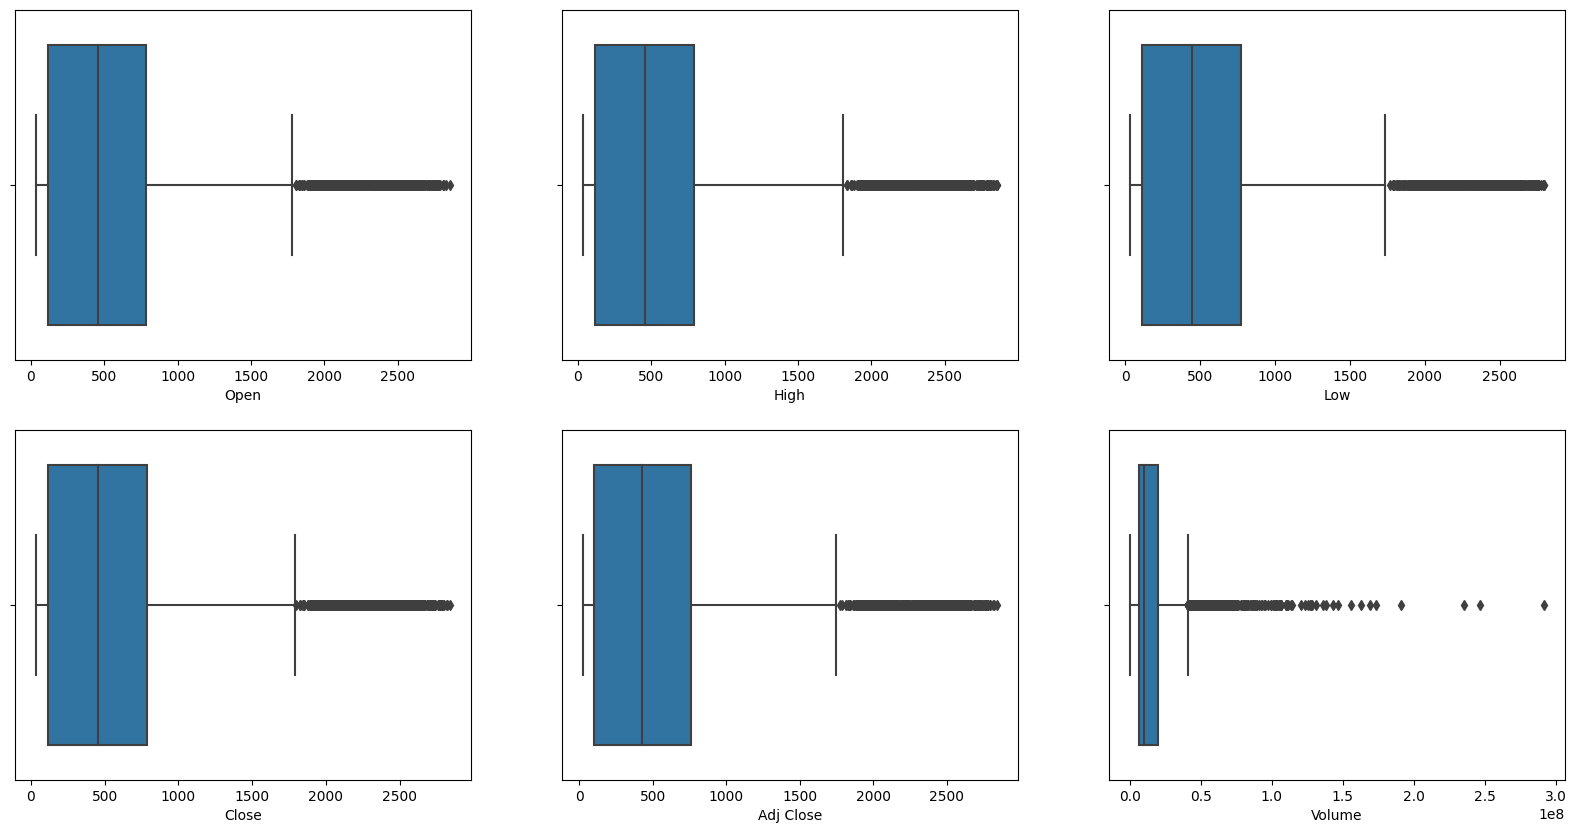

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Assuming df is a DataFrame containing the data you want to plot
# Let's assume you want to plot numeric columns only

numeric_columns = df.select_dtypes(include=[int, float]).columns

if numeric_columns.empty:
    print("No numeric columns found in the DataFrame.")
else:
    num_cols = len(numeric_columns)
    rows = (num_cols - 1) // 3 + 1  # Calculate the number of subplot rows based on 3 columns per row

    plt.figure(figsize=(20, 10))
    for i, col in enumerate(numeric_columns):
        plt.subplot(2, 3, i + 1)  # Adjust subplot placement based on the number of columns
        sb.boxplot(data=df, x=col, orient='h')  # Horizontal boxplot
    plt.show()


In [12]:
import pandas as pd

# Assuming df is a DataFrame containing the data you want to work with
# Let's assume the 'Date' column is in string format and contains dates in different formats

# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing or invalid dates (optional step)
df.dropna(subset=['Date'], inplace=True)

# Extract day, month, and year from the 'Date' column
df['day'] = df['Date'].dt.day.astype('int')
df['month'] = df['Date'].dt.month.astype('int')
df['year'] = df['Date'].dt.year.astype('int')

# Display the updated DataFrame with 'day', 'month', and 'year' columns
print(df.head())


        Date       Open       High        Low      Close  Adj Close  \
0 2000-03-01  36.747459  38.944569  36.747459  38.944569  29.684196   
1 2000-04-01  39.981236  42.062302  38.882679  42.062302  32.060574   
2 2000-05-01  39.710464  44.545658  39.710464  43.710136  33.316589   
3 2000-06-01  44.715855  46.526150  44.715855  45.543640  34.714119   
4 2000-07-01  45.644211  49.187443  45.334759  48.669109  37.096401   

      Volume  day  month  year  
0   28802010    1      3  2000  
1   61320457    1      4  2000  
2  173426953    1      5  2000  
3  101355113    1      6  2000  
4  128426756    1      7  2000  


In [13]:
import numpy as np

# Assuming df is a DataFrame containing the 'month' column (previously extracted from the 'Date' column)
# Let's assume you have already performed the steps to extract 'month' from the 'Date' column

# Calculate the 'is_quarter_end' column
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)

# Display the DataFrame with the new 'is_quarter_end' column
print(df.head())


        Date       Open       High        Low      Close  Adj Close  \
0 2000-03-01  36.747459  38.944569  36.747459  38.944569  29.684196   
1 2000-04-01  39.981236  42.062302  38.882679  42.062302  32.060574   
2 2000-05-01  39.710464  44.545658  39.710464  43.710136  33.316589   
3 2000-06-01  44.715855  46.526150  44.715855  45.543640  34.714119   
4 2000-07-01  45.644211  49.187443  45.334759  48.669109  37.096401   

      Volume  day  month  year  is_quarter_end  
0   28802010    1      3  2000               1  
1   61320457    1      4  2000               0  
2  173426953    1      5  2000               0  
3  101355113    1      6  2000               1  
4  128426756    1      7  2000               0  


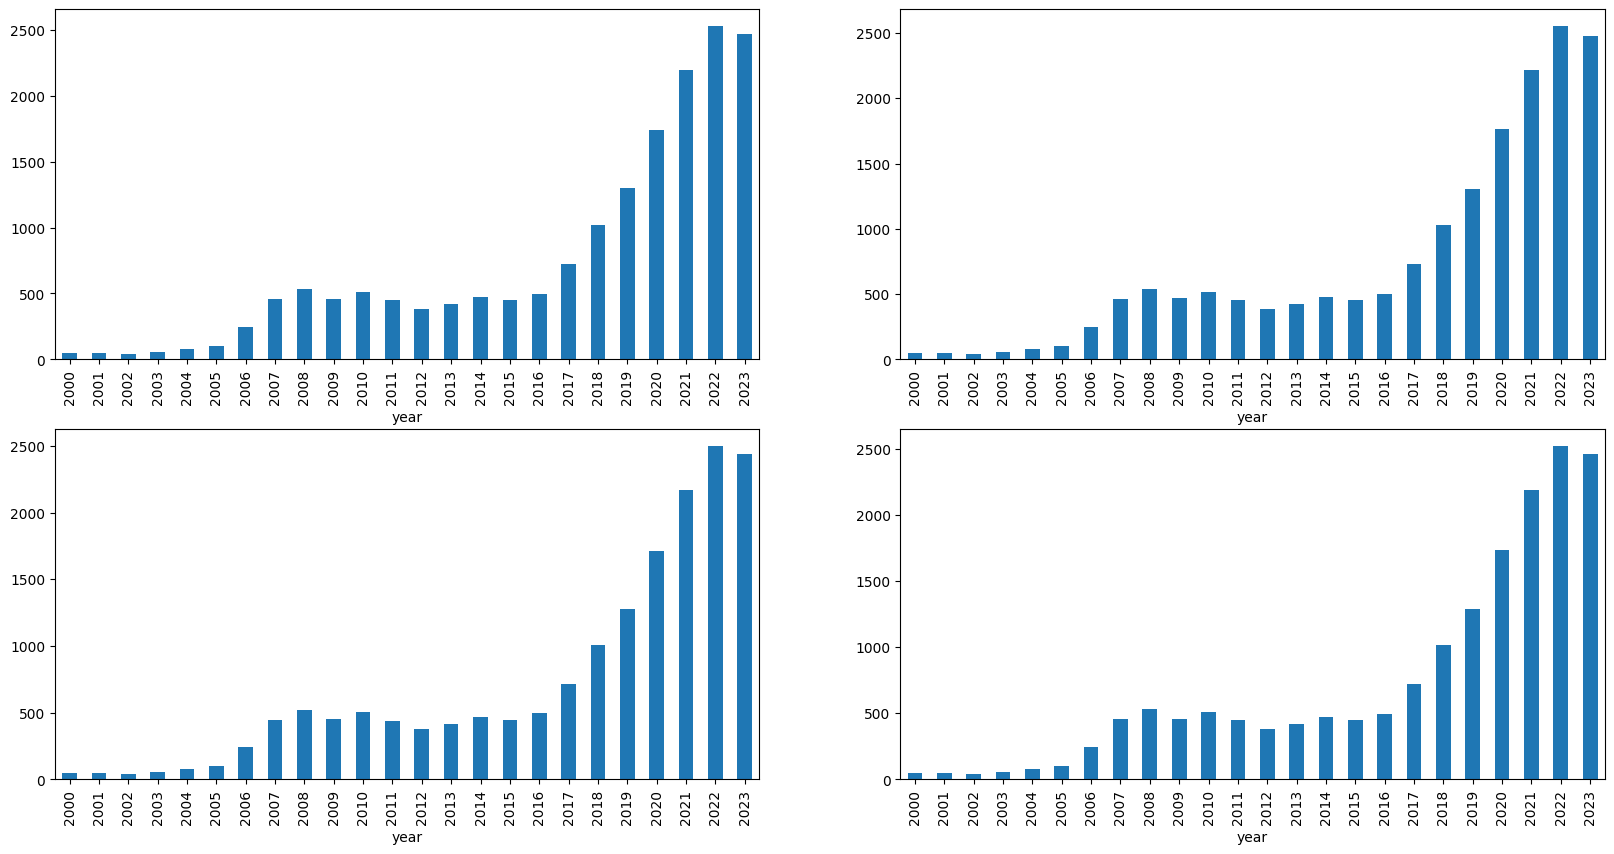

In [14]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [15]:
df.groupby('is_quarter_end').mean()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,,
0,2011-08-02 14:30:22.251138560,676.567665,684.128629,667.768938,675.689495,653.780673,1.609769e+07,6.432010,6.083930,2011.147690
1,2011-10-29 15:56:17.606177536,684.664954,693.106567,676.639239,684.915431,663.413011,1.611364e+07,6.405405,7.498069,2011.271557


In [16]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

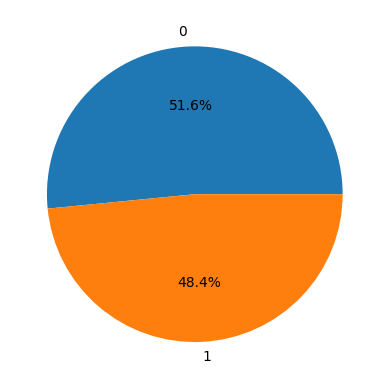

In [17]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

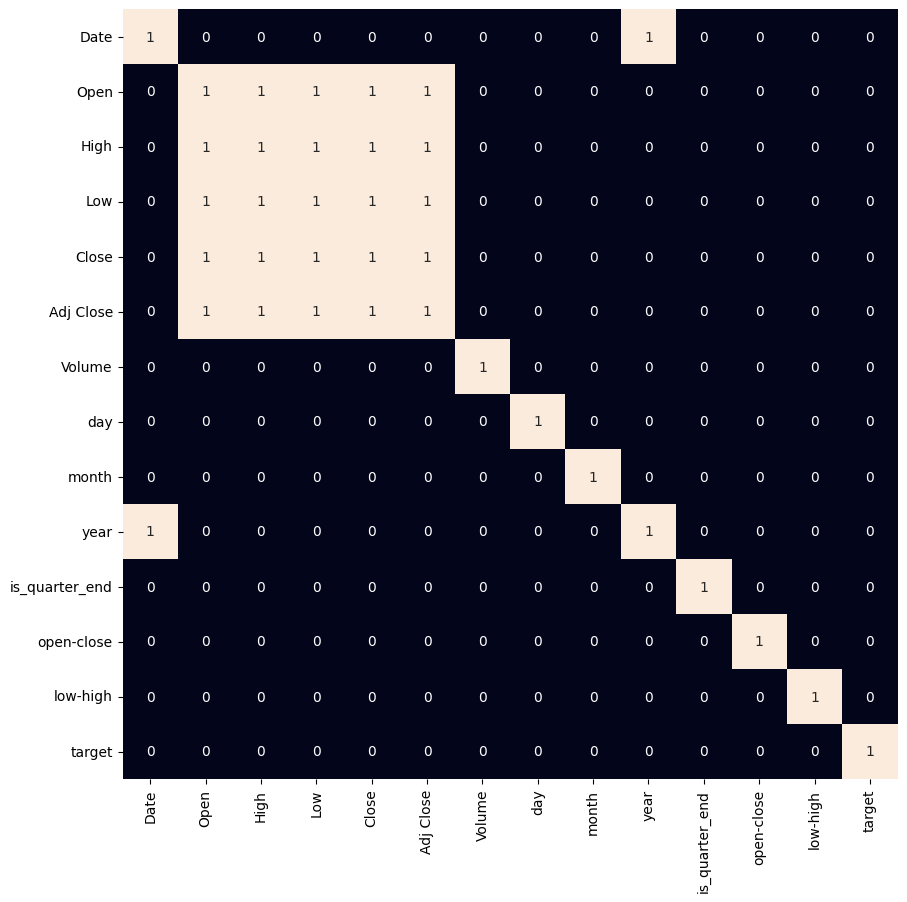

In [18]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df is a DataFrame containing the relevant data, including 'open-close', 'low-high', 'is_quarter_end', and 'target' columns.

# Selecting the features and target variables
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features (scaling to have mean=0 and variance=1)
features = scaler.fit_transform(features)

# Split the data into training and validation sets
# test_size=0.1 means 10% of the data will be used for validation, and random_state is set for reproducibility
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)

# Print the shapes of the training and validation sets
print(X_train.shape, X_valid.shape)


(2082, 3) (232, 3)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Assuming X_train, Y_train, X_valid, and Y_valid are already defined from the previous steps.

# Initialize the models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Train the models and evaluate their performance
for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training ROC AUC Score : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation ROC AUC Score : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training ROC AUC Score :  0.5114486859642527
Validation ROC AUC Score :  0.4738839285714286

SVC(kernel='poly', probability=True) : 
Training ROC AUC Score :  0.49668639282801474
Validation ROC AUC Score :  0.5244791666666666

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ..

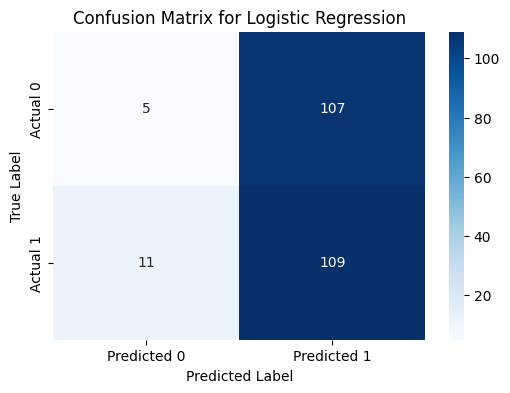

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming models[0], X_valid, and Y_valid are already defined from the previous steps.

# Predict the target values for the validation set using the first model (Logistic Regression)
y_pred = models[0].predict(X_valid)

# Calculate the confusion matrix
cm = confusion_matrix(Y_valid, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
